# GRIP: THE SPARKS FOUNDATION

# Data Science and Business Analytics Internship

# Task6: Prediction Using Decision Tree Algorithm

# Submitted by Mayur Asnani

#### Importing useful python libraries

In [1]:
import pandas as pd
import numpy as np

#### Generating dataset

In [2]:
data=pd.read_csv('/Users/mayurasnani/Downloads/Iris.csv')

In [3]:
data.head(n=10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [4]:
# we drop unwanted column

columns_to_drop=['Id']
data_clean=data.drop(columns=columns_to_drop)

In [5]:
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
data_clean.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


### Here, We now seperate the independent variables and target variable

In [7]:
input_cols=['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']
output_cols=['Species']

X=data_clean[input_cols]
Y=data_clean[output_cols]

In [8]:
X

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [9]:
Y

,Species
0,Iris-setosa
1,Iris-setosa
2,Iris-setosa
3,Iris-setosa
4,Iris-setosa
...,...
145,Iris-virginica
146,Iris-virginica
147,Iris-virginica
148,Iris-virginica


In [10]:
print(X.shape,Y.shape)

(150, 4) (150, 1)


### we randomly shuffle our data_clean

In [11]:
from sklearn.utils import shuffle
data_clean = shuffle(data_clean,random_state=13)

### we split our data into Train and Test

In [12]:
split=int(0.7*data_clean.shape[0])
train_data=data_clean[:split]
test_data=data_clean[split:]
test_data=test_data.reset_index(drop=True)

In [13]:
print(train_data.shape,test_data.shape)

(105, 5) (45, 5)


# Implimenting Decision Tree

In [14]:
from sklearn.tree import DecisionTreeClassifier

In [15]:
sk_tree=DecisionTreeClassifier(criterion='entropy',max_depth=5)

In [16]:
# Training our data

sk_tree.fit(train_data[input_cols],train_data[output_cols])

DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [17]:
y_pred=sk_tree.predict(test_data[input_cols])
print(y_pred)

['Iris-setosa' 'Iris-versicolor' 'Iris-versicolor' 'Iris-virginica'
 'Iris-virginica' 'Iris-setosa' 'Iris-virginica' 'Iris-setosa'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-virginica' 'Iris-setosa'
 'Iris-virginica' 'Iris-setosa' 'Iris-versicolor' 'Iris-setosa'
 'Iris-virginica' 'Iris-virginica' 'Iris-setosa' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-virginica' 'Iris-versicolor' 'Iris-virginica'
 'Iris-virginica' 'Iris-setosa' 'Iris-setosa' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-virginica' 'Iris-virginica' 'Iris-setosa' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-virginica' 'Iris-virginica'
 'Iris-versicolor' 'Iris-setosa' 'Iris-versicolor' 'Iris-versicolor']


In [18]:
y_actual=test_data[output_cols]
y_actual=y_actual.values
y_actual=y_actual.reshape((-1,))

In [19]:
print(y_actual.shape,y_pred.shape)

(45,) (45,)


# Accuracy :

In [20]:
from sklearn import metrics

### For train

In [21]:
y_pred=sk_tree.predict(train_data[input_cols])

In [22]:
print("Train Result:\n")
print("accuracy score: {0:.4f}\n".format(metrics.accuracy_score(train_data[output_cols],y_pred)))
print("Classification Report: \n {}\n".format(metrics.classification_report(train_data[output_cols],y_pred)))
print("Confusion Matrix: \n {}\n".format(metrics.confusion_matrix(train_data[output_cols],y_pred)))

Train Result:

accuracy score: 0.9905

Classification Report: 
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        35
Iris-versicolor       0.97      1.00      0.99        33
 Iris-virginica       1.00      0.97      0.99        37

       accuracy                           0.99       105
      macro avg       0.99      0.99      0.99       105
   weighted avg       0.99      0.99      0.99       105


Confusion Matrix: 
 [[35  0  0]
 [ 0 33  0]
 [ 0  1 36]]



### For Test

In [23]:
y_pred=sk_tree.predict(test_data[input_cols])

In [24]:
print("Test Result:\n")
print("accuracy score: {0:.4f}\n".format(metrics.accuracy_score(y_actual,y_pred)))
print("Classification Report: \n {}\n".format(metrics.classification_report(y_actual,y_pred)))
print("Confusion Matrix: \n {}\n".format(metrics.confusion_matrix(y_actual,y_pred)))

Test Result:

accuracy score: 0.9778

Classification Report: 
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        15
Iris-versicolor       1.00      0.94      0.97        17
 Iris-virginica       0.93      1.00      0.96        13

       accuracy                           0.98        45
      macro avg       0.98      0.98      0.98        45
   weighted avg       0.98      0.98      0.98        45


Confusion Matrix: 
 [[15  0  0]
 [ 0 16  1]
 [ 0  0 13]]



# Conclusion: The accuracy of the Decision tree model is 97.78%.

# Visualising A Decision Tree

In [28]:
Y=data_clean['Species']

In [29]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt


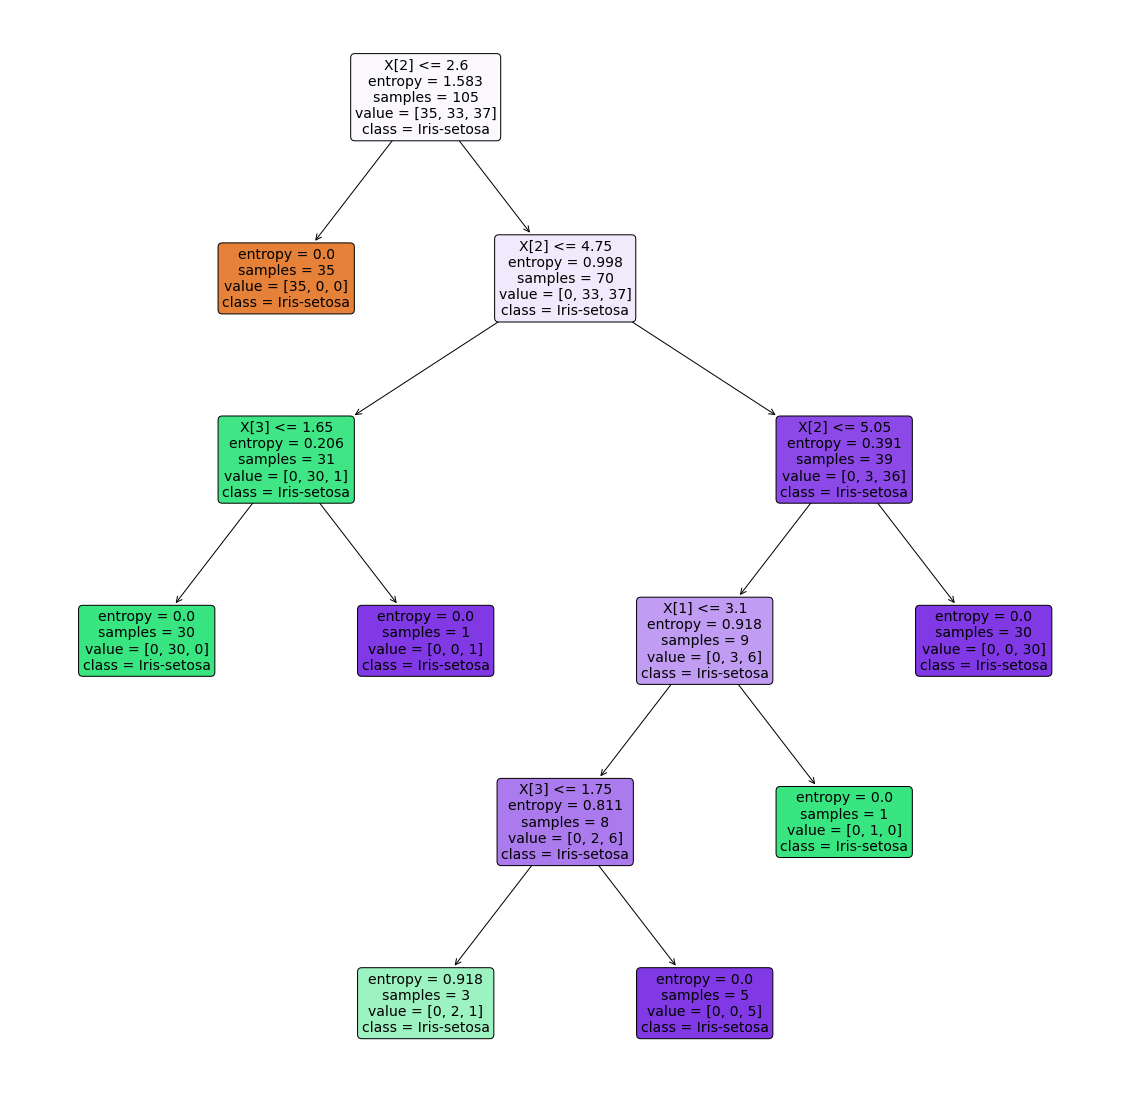

In [30]:
plt.figure(figsize=(20,20))
tree=plot_tree(sk_tree,class_names=Y,rounded=True, filled = True,fontsize=14)
plt.show()